<a href="https://colab.research.google.com/github/gurnish-singh/machine-learning/blob/master/old%20school%20mnist%20using%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.5497 - acc: 0.8399
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.1467 - acc: 0.9556
Epoch 3/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0977 - acc: 0.9704
Epoch 4/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0777 - acc: 0.9761
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0660 - acc: 0.9801


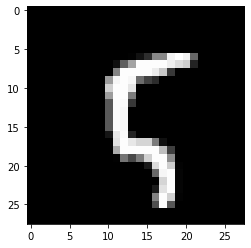

In [0]:
import tensorflow as tf

# YOUR CODE STARTS HERE
from tensorflow import keras
import matplotlib.pyplot as plt
# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
plt.gray()
plt.imshow(training_images[100])
print(training_images.shape)
training_images=training_images.reshape(60000,28,28,1)# 1 specifies that is is grey scale
test_images=test_images.reshape(10000,28,28,1)
training_images=training_images/255;
test_images=test_images/255;

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)



In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 4s 399us/sample - loss: 0.0545 - acc: 0.9823


[0.05454663760960102, 0.9823]

In [0]:
print(test_labels[5])

1


In [0]:
model.predict(test_images)[5,:]

array([3.4686905e-06, 9.9939561e-01, 8.4611702e-06, 6.5890345e-07,
       1.4816834e-04, 9.4896706e-08, 1.9378822e-05, 3.8439239e-04,
       3.2304553e-05, 7.4705958e-06], dtype=float32)

so predicting test label=1 here gives highest value on the respecive index of 1 in model.predict()
